In [4]:

#Summary Stats
import pandas as pd

data = pd.read_csv('DataTeam2_no_na.csv')

data['Cumulative_Retirement'] = data['Retirements2010xPost2010'].cumsum()
data['Cumulative_Appointed_Judges'] = data['Appointments2010xPost2010'].cumsum()

data['criminal_bench'] = data['Specialization_bench'].apply(lambda x: 1 if 'Criminal_Bench' in x else 0)
data['tax_bench'] = data['Specialization_bench'].apply(lambda x: 1 if 'Tax_Bench' in x else 0)
data['writ_bench'] = data['Specialization_bench'].apply(lambda x: 1 if 'Writ_Bench' in x else 0)
data['property_bench'] = data['Specialization_bench'].apply(lambda x: 1 if 'Property_Bench' in x else 0)

summary_stats = data[['Cumulative_Retirement', 'Cumulative_Appointed_Judges',
                      'criminal_bench', 'tax_bench', 'writ_bench', 'property_bench',
                      'StateWins', 'correct', 'Process_Followed', 'Merit', 'caselag']].describe()

print("Summary Statistics:\n", summary_stats)

additional_stats = data[['Cumulative_Retirement', 'Cumulative_Appointed_Judges',
                         'criminal_bench', 'tax_bench', 'writ_bench', 'property_bench',
                         'StateWins', 'correct', 'Process_Followed', 'Merit', 'caselag']].agg(['median', 'std'])

print("\nAdditional Statistics (median, std):\n", additional_stats)

mode_stats = data[['Cumulative_Retirement', 'Cumulative_Appointed_Judges',
                   'criminal_bench', 'tax_bench', 'writ_bench', 'property_bench',
                   'StateWins', 'correct', 'Process_Followed', 'Merit', 'caselag']].mode()

print("\nMode Statistics:\n", mode_stats)

summary_stats.to_csv('summary_statistics.csv')
additional_stats.to_csv('additional_statistics.csv')
mode_stats.to_csv('mode_statistics.csv')


Summary Statistics:
        Cumulative_Retirement  Cumulative_Appointed_Judges  criminal_bench  \
count            8590.000000                  8590.000000     8590.000000   
mean               82.041772                    53.882812        0.277998   
std               127.461923                    83.034602        0.448038   
min                 0.000000                     0.000000        0.000000   
25%                 0.000000                     0.000000        0.000000   
50%                 0.000000                     0.000000        0.000000   
75%               147.700002                    99.583335        1.000000   
max               419.358339                   273.733337        1.000000   

         tax_bench   writ_bench  property_bench    StateWins      correct  \
count  8590.000000  8590.000000     8590.000000  8590.000000  8590.000000   
mean      0.270664     0.245751        0.205588     0.560419     0.443655   
std       0.444328     0.430557        0.404154     0.

In [ ]:
#OLS
import pandas as pd
import statsmodels.api as sm

data = pd.read_csv('DataTeam2_no_na.csv')

X = data[['Appointments2010xPost2010']]
X = sm.add_constant(X)  # Add intercept

control_vars = ['StateWins', 'caselag', 'Merit', 'Process_Followed', 'correct']
data['response_var'] = data[control_vars].sum(axis=1)

predictor_vars = ['Retirements2010xPost2010']
X = pd.concat([X, data[predictor_vars]], axis=1)

y = data['response_var']

model = sm.OLS(y, X, missing='drop').fit()

print(model.summary())

latex_output = model.summary().as_latex()
with open("regression_summary.tex", "w") as f:
    f.write(latex_output)



                            OLS Regression Results                            
Dep. Variable:           response_var   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     42.63
Date:                Fri, 18 Oct 2024   Prob (F-statistic):           3.77e-19
Time:                        23:37:26   Log-Likelihood:                -21227.
No. Observations:                8590   AIC:                         4.246e+04
Df Residuals:                    8587   BIC:                         4.248e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

**IV Results**

**Doing the NEW IV**

In [ ]:
import pandas as pd
import statsmodels.api as sm
from linearmodels.iv import IV2SLS

data = pd.read_csv('DataTeam2_no_na.csv')

data['judicial_decision_quality'] = data[['StateWins', 'correct', 'Process_Followed', 'Merit', 'caselag']].sum(axis=1)

endog = data['Appointments2010xPost2010']  # Endogenous variable (X)
instrument = data['Retirements2010xPost2010']  # Instrument variable (Z)

Y = data['judicial_decision_quality']

fixed_effects = ['AppointmentYear']

exog = sm.add_constant(data[fixed_effects])

exog_clean = exog.replace([np.inf, -np.inf], np.nan).dropna()
Y_clean = Y.loc[exog_clean.index]
endog_clean = endog.loc[exog_clean.index]
instrument_clean = instrument.loc[exog_clean.index]

# --- First Stage ---
first_stage_model = sm.OLS(endog_clean, sm.add_constant(instrument_clean)).fit()

# --- Second Stage for 2SLS (IV) ---
iv_model = IV2SLS(
    dependent=Y_clean,
    exog=exog_clean,
    endog=endog_clean,
    instruments=instrument_clean
).fit()


print("\nFirst Stage (X on Z):\n")
print(first_stage_model.summary())  # This is fine as it is

print("\nSecond Stage (Y on X predicted from Z) - 2SLS:\n")
print(iv_model.summary)  # Remove the parentheses here




First Stage (X on Z):

                                OLS Regression Results                               
Dep. Variable:     Appointments2010xPost2010   R-squared:                       0.779
Model:                                   OLS   Adj. R-squared:                  0.779
Method:                        Least Squares   F-statistic:                 3.021e+04
Date:                       Mon, 21 Oct 2024   Prob (F-statistic):               0.00
Time:                               00:15:15   Log-Likelihood:                 12720.
No. Observations:                       8567   AIC:                        -2.544e+04
Df Residuals:                           8565   BIC:                        -2.542e+04
Df Model:                                  1                                         
Covariance Type:                   nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------

## Ridge + Lasso

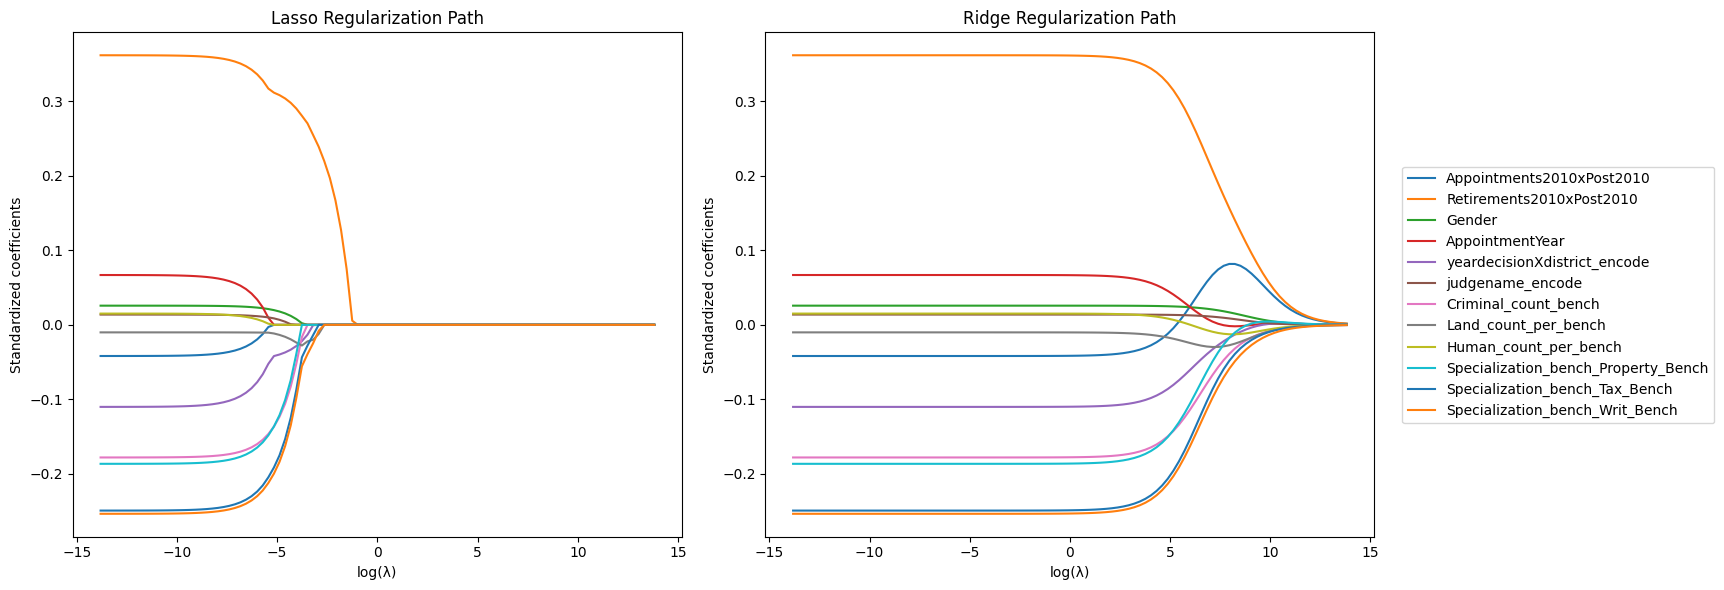

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LassoCV, Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

data = pd.read_csv('DataTeam2_no_na.csv')

data['judicial_decision_quality'] = data[['StateWins', 'correct', 'Process_Followed', 'Merit', 'caselag']].sum(axis=1)

X_relevant = data[['Appointments2010xPost2010', 'Retirements2010xPost2010', 'Gender', 'AppointmentYear',
                   'Specialization_bench', 'yeardecisionXdistrict_encode', 'judgename_encode',
                   'Criminal_count_bench', 'Land_count_per_bench', 'Human_count_per_bench']]

X_relevant_encoded = pd.get_dummies(X_relevant, drop_first=True)

X_relevant_encoded_filled = X_relevant_encoded.fillna(X_relevant_encoded.mean())

y = data['judicial_decision_quality']

X_train, X_test, y_train, y_test = train_test_split(X_relevant_encoded_filled, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lasso_cv = LassoCV(alphas=np.logspace(-6, 6, 100), cv=5)
lasso_cv.fit(X_train_scaled, y_train)

alphas_ridge = np.logspace(-6, 6, 100)
ridge_coefs = []
for alpha in alphas_ridge:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train_scaled, y_train)
    ridge_coefs.append(ridge.coef_)

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

for i in range(len(lasso_cv.coef_)):
    axes[0].plot(np.log(lasso_cv.alphas_), lasso_cv.path(X_train_scaled, y_train, alphas=np.logspace(-6, 6, 100))[1][i])
axes[0].set_xlabel('log(λ)')
axes[0].set_ylabel('Standardized coefficients')
axes[0].set_title('Lasso Regularization Path')

ridge_coefs = np.array(ridge_coefs)
for i in range(ridge_coefs.shape[1]):
    axes[1].plot(np.log(alphas_ridge), ridge_coefs[:, i])
axes[1].set_xlabel('log(λ)')
axes[1].set_ylabel('Standardized coefficients')
axes[1].set_title('Ridge Regularization Path')

fig.legend(X_relevant_encoded_filled.columns, loc='center left', bbox_to_anchor=(1, 0.5))

plt.tight_layout()
plt.show()


**regression Tree**

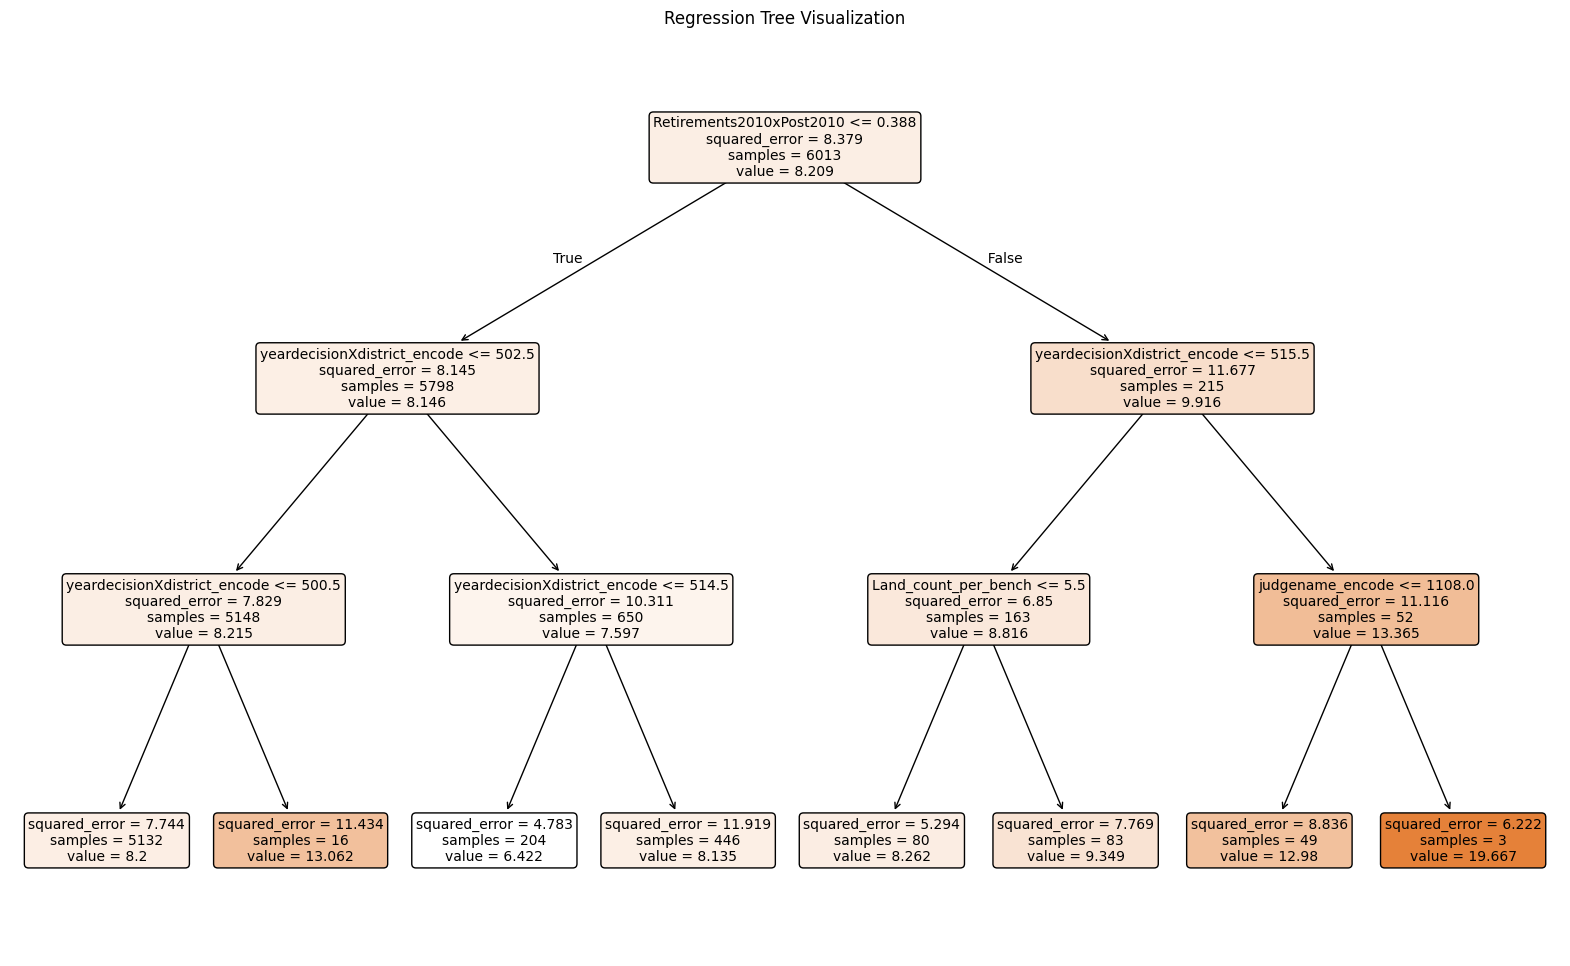

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree
import matplotlib.pyplot as plt

data = pd.read_csv('DataTeam2_no_na.csv')

data['judicial_decision_quality'] = data[['StateWins', 'correct', 'Process_Followed', 'Merit', 'caselag']].sum(axis=1)

X_relevant = data[['Appointments2010xPost2010', 'Retirements2010xPost2010', 'Gender', 'AppointmentYear',
                   'Specialization_bench', 'yeardecisionXdistrict_encode', 'judgename_encode',
                   'Criminal_count_bench', 'Land_count_per_bench', 'Human_count_per_bench']]

X_relevant_encoded = pd.get_dummies(X_relevant, drop_first=True)

X_relevant_encoded_filled = X_relevant_encoded.fillna(X_relevant_encoded.mean())

y = data['judicial_decision_quality']

X_train, X_test, y_train, y_test = train_test_split(X_relevant_encoded_filled, y, test_size=0.3, random_state=42)

tree_model = DecisionTreeRegressor(max_depth=3, random_state=42)  # Adjust max_depth for interpretability
tree_model.fit(X_train, y_train)

plt.figure(figsize=(20, 12))  # Larger figure
plot_tree(tree_model, filled=True, feature_names=X_relevant_encoded_filled.columns, rounded=True, fontsize=10)  # Larger font
plt.title("Regression Tree Visualization")
plt.show()


**Classification Tree**

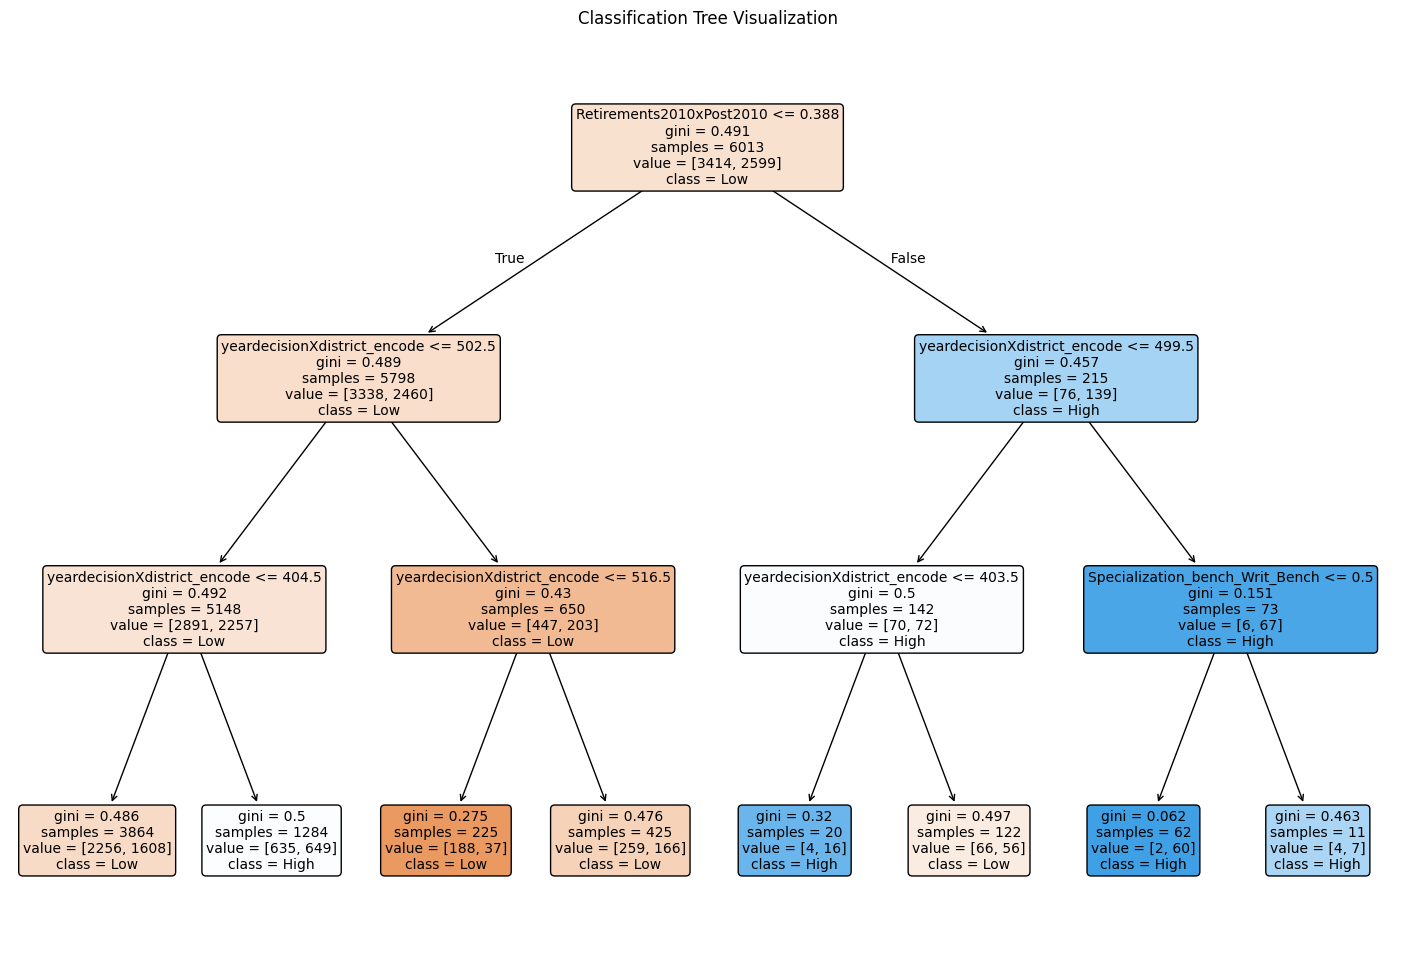

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
import numpy as np

data = pd.read_csv('DataTeam2_no_na.csv')

data['combined_outcome'] = data[['StateWins', 'correct', 'Process_Followed', 'Merit', 'caselag']].sum(axis=1)


data['y_class'] = np.where(data['combined_outcome'] > data['combined_outcome'].median(), 1, 0)

X_relevant = data[['Appointments2010xPost2010', 'Retirements2010xPost2010',
                   'Specialization_bench', 'yeardecisionXdistrict_encode']]

X_relevant_encoded = pd.get_dummies(X_relevant, drop_first=True)

X_relevant_encoded_filled = X_relevant_encoded.fillna(X_relevant_encoded.mean())

y = data['y_class']

X_train, X_test, y_train, y_test = train_test_split(X_relevant_encoded_filled, y, test_size=0.3, random_state=42)

tree_model = DecisionTreeClassifier(max_depth=3, random_state=42)
tree_model.fit(X_train, y_train)

plt.figure(figsize=(18, 12))
plot_tree(tree_model, filled=True, feature_names=X_relevant_encoded_filled.columns,
          class_names=['Low', 'High'], rounded=True, fontsize=10)
plt.title("Classification Tree Visualization")
plt.show()


**importance matrix**

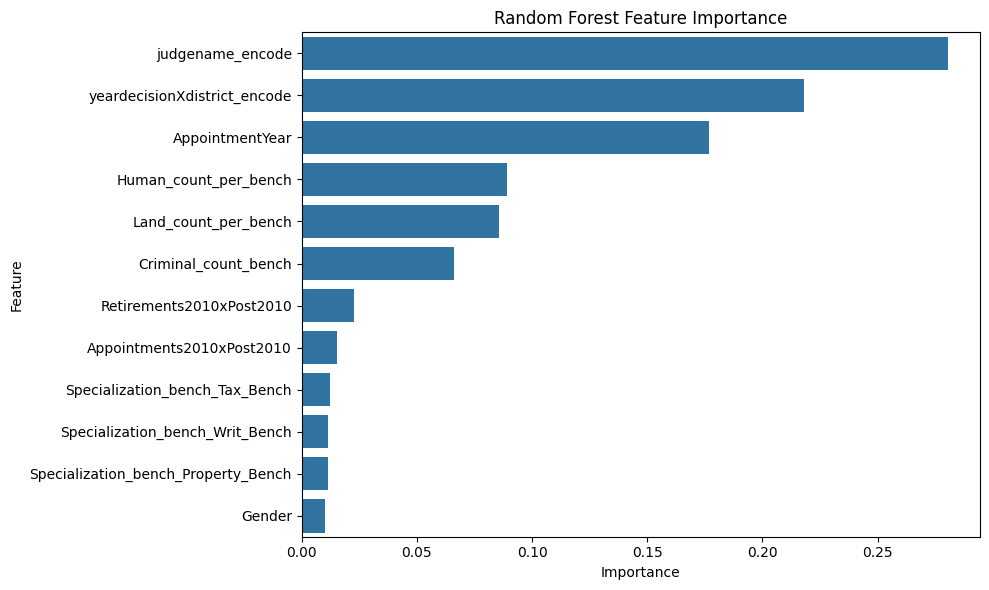

                                Feature  Importance
5                      judgename_encode    0.280436
4          yeardecisionXdistrict_encode    0.217881
3                       AppointmentYear    0.176919
8                 Human_count_per_bench    0.089265
7                  Land_count_per_bench    0.085686
6                  Criminal_count_bench    0.066133
1              Retirements2010xPost2010    0.022829
0             Appointments2010xPost2010    0.015523
10       Specialization_bench_Tax_Bench    0.012513
11      Specialization_bench_Writ_Bench    0.011578
9   Specialization_bench_Property_Bench    0.011293
2                                Gender    0.009944


In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('DataTeam2_no_na.csv')

data['combined_outcome'] = data[['StateWins', 'correct', 'Process_Followed', 'Merit', 'caselag']].sum(axis=1)


data['y_class'] = (data['combined_outcome'] > data['combined_outcome'].median()).astype(int)

# Select relevant predictor variables (X)
X_relevant = data[['Appointments2010xPost2010', 'Retirements2010xPost2010', 'Gender', 'AppointmentYear',
                   'Specialization_bench', 'yeardecisionXdistrict_encode', 'judgename_encode',
                   'Criminal_count_bench', 'Land_count_per_bench', 'Human_count_per_bench']]

# One-hot encoding for non-numeric columns
X_relevant_encoded = pd.get_dummies(X_relevant, drop_first=True)

# Fill missing values by imputing the mean
X_relevant_encoded_filled = X_relevant_encoded.fillna(X_relevant_encoded.mean())

# Define the new categorical target variable
y = data['y_class']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_relevant_encoded_filled, y, test_size=0.3, random_state=42)

# Fit a Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Get feature importances
feature_importances = rf_model.feature_importances_

# Create a DataFrame for feature importances
importance_df = pd.DataFrame({'Feature': X_relevant_encoded_filled.columns, 'Importance': feature_importances})

# Sort by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Random Forest Feature Importance')
plt.tight_layout()
plt.show()

# Displaying the importance matrix
print(importance_df)


**Error comprarison**


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, GradientBoostingClassifier
from sklearn.metrics import mean_squared_error
import numpy as np

data = pd.read_csv('DataTeam2_no_na.csv')

data['combined_outcome'] = data[['StateWins', 'correct', 'Process_Followed', 'Merit', 'caselag']].sum(axis=1)

data['y_class'] = np.where(data['combined_outcome'] > data['combined_outcome'].median(), 1, 0)

X_relevant = data[['Appointments2010xPost2010', 'Retirements2010xPost2010', 'Gender', 'AppointmentYear',
                   'Specialization_bench', 'yeardecisionXdistrict_encode', 'judgename_encode',
                   'Criminal_count_bench', 'Land_count_per_bench', 'Human_count_per_bench']]

X_relevant_encoded = pd.get_dummies(X_relevant, drop_first=True)
X_relevant_encoded_filled = X_relevant_encoded.fillna(X_relevant_encoded.mean())

y = data['y_class']

X_train, X_test, y_train, y_test = train_test_split(X_relevant_encoded_filled, y, test_size=0.3, random_state=42)

tree_model = DecisionTreeClassifier(max_depth=4, random_state=42)
random_forest_model = RandomForestClassifier(random_state=42)
bagging_model = BaggingClassifier(random_state=42)
boosting_model = GradientBoostingClassifier(random_state=42)

tree_model.fit(X_train, y_train)
random_forest_model.fit(X_train, y_train)
bagging_model.fit(X_train, y_train)
boosting_model.fit(X_train, y_train)

y_pred_tree = tree_model.predict(X_test)
y_pred_rf = random_forest_model.predict(X_test)
y_pred_bagging = bagging_model.predict(X_test)
y_pred_boosting = boosting_model.predict(X_test)

mse_tree = mean_squared_error(y_test, y_pred_tree)
mse_rf = mean_squared_error(y_test, y_pred_rf)
mse_bagging = mean_squared_error(y_test, y_pred_bagging)
mse_boosting = mean_squared_error(y_test, y_pred_boosting)

rmse_tree = np.sqrt(mse_tree)
rmse_rf = np.sqrt(mse_rf)
rmse_bagging = np.sqrt(mse_bagging)
rmse_boosting = np.sqrt(mse_boosting)

error_comparison = pd.DataFrame({
    'Model': ['Decision Tree', 'Random Forest', 'Bagging', 'Boosting'],
    'MSE': [mse_tree, mse_rf, mse_bagging, mse_boosting],
    'RMSE': [rmse_tree, rmse_rf, rmse_bagging, rmse_boosting]
})

print(error_comparison)


           Model       MSE      RMSE
0  Decision Tree  0.429957  0.655711
1  Random Forest  0.455180  0.674671
2        Bagging  0.448972  0.670053
3       Boosting  0.422584  0.650065


**DAG**

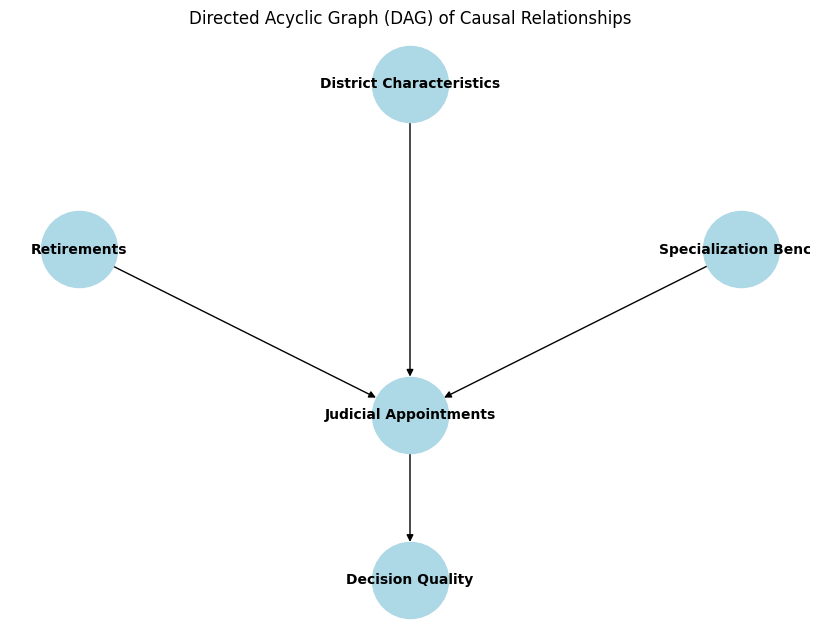

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx

DAG = nx.DiGraph()

DAG.add_node("Judicial Appointments")
DAG.add_node("Retirements")
DAG.add_node("Specialization Bench")
DAG.add_node("District Characteristics")
DAG.add_node("Decision Quality")

DAG.add_edge("Retirements", "Judicial Appointments")
DAG.add_edge("Specialization Bench", "Judicial Appointments")
DAG.add_edge("District Characteristics", "Judicial Appointments")
DAG.add_edge("Judicial Appointments", "Decision Quality")

pos = {
    "Judicial Appointments": (1, 1),
    "Retirements": (0, 2),
    "Specialization Bench": (2, 2),
    "District Characteristics": (1, 3),
    "Decision Quality": (1, 0)
}

plt.figure(figsize=(8, 6))
nx.draw(DAG, pos, with_labels=True, node_color='lightblue', node_size=3000, font_size=10, font_weight='bold', arrows=True)
plt.title('Directed Acyclic Graph (DAG) of Causal Relationships')
plt.show()


**DAG again**

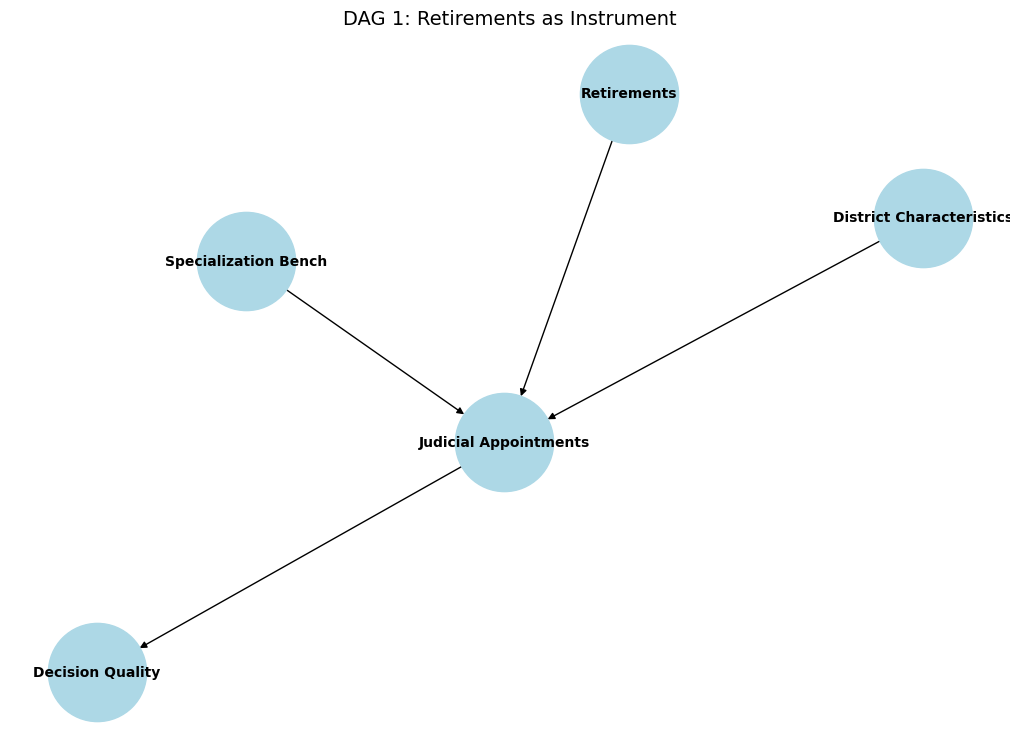

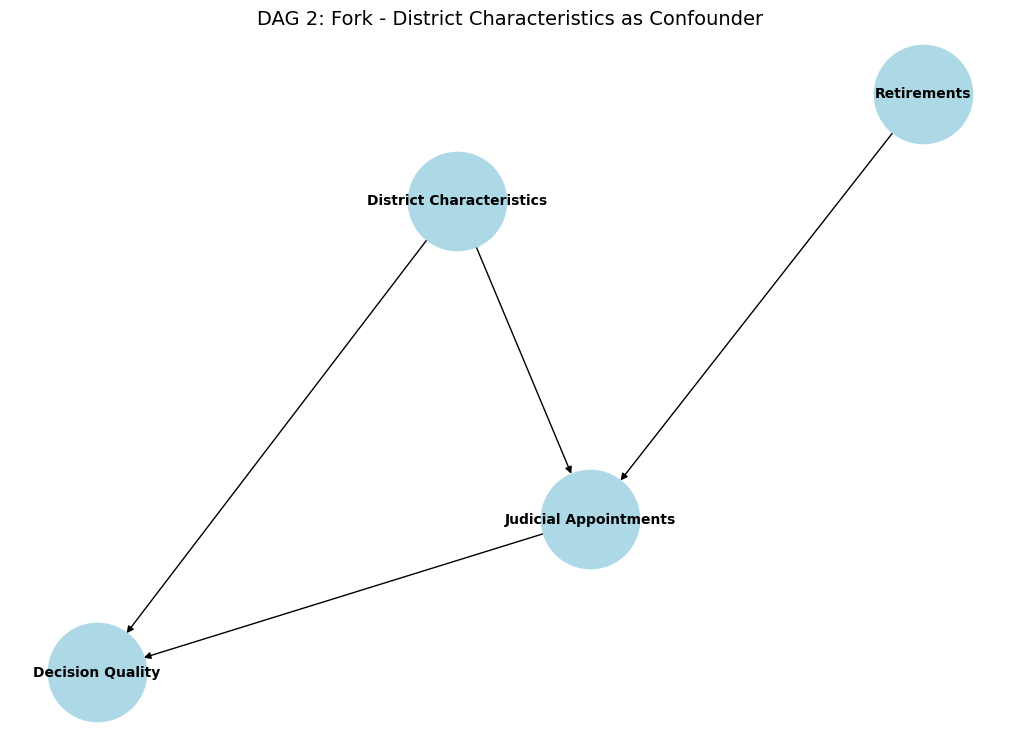

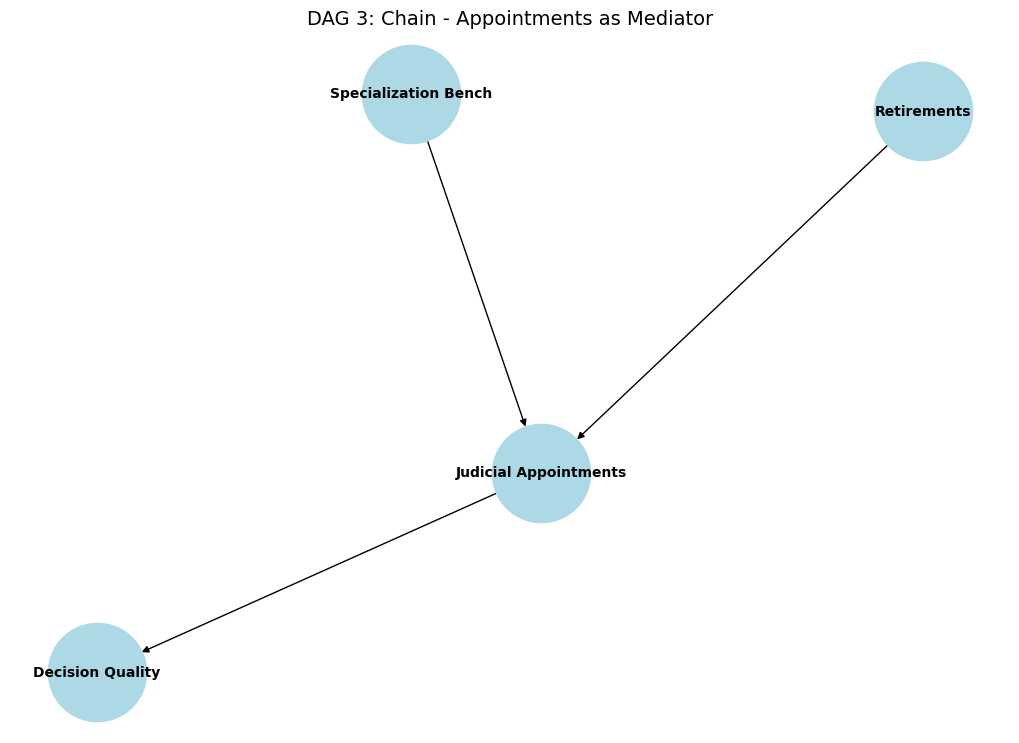

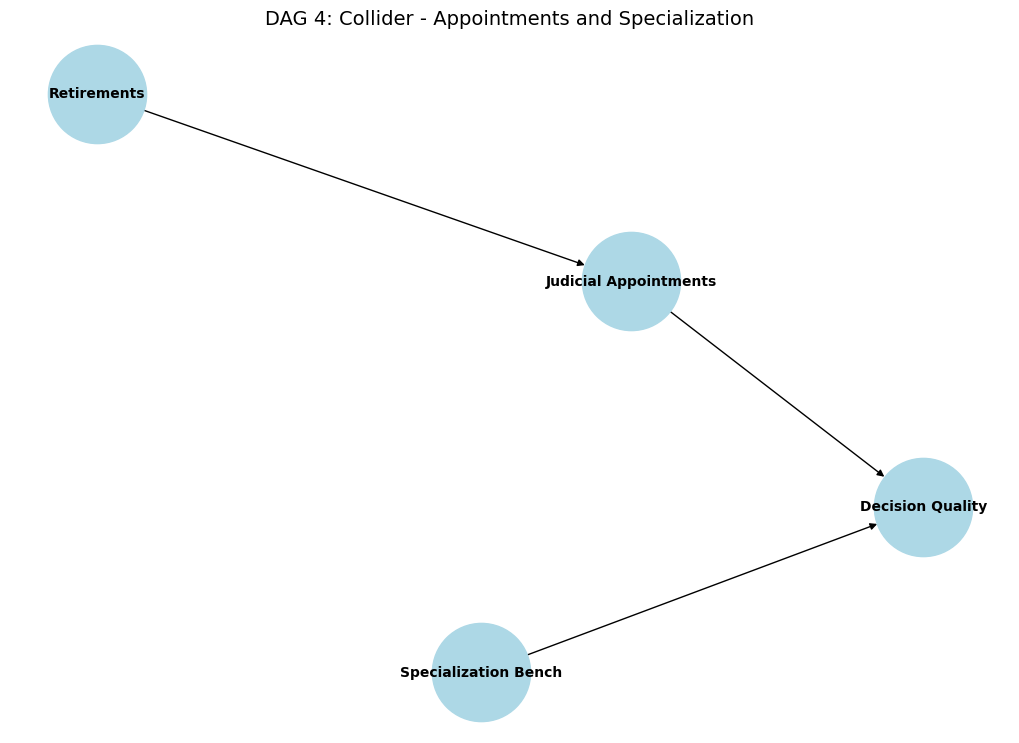

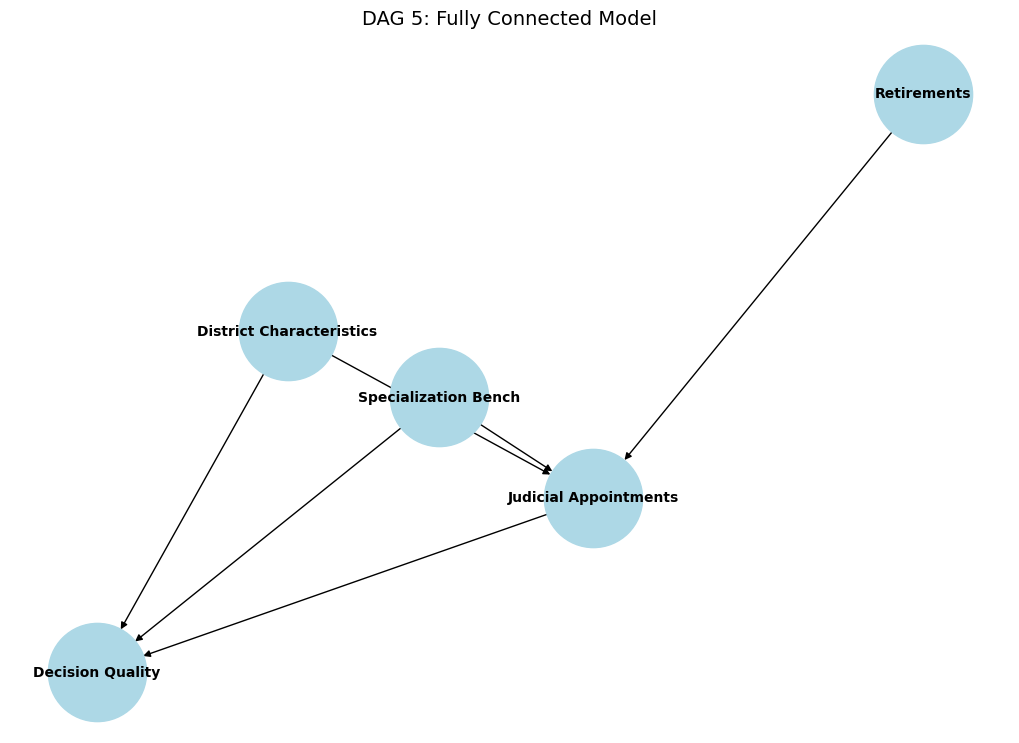

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx

def plot_dag(edges, title):
    G = nx.DiGraph()
    G.add_edges_from(edges)
    pos = nx.spring_layout(G, seed=42)
    plt.figure(figsize=(10, 7))
    nx.draw(G, pos, with_labels=True, node_size=5000, node_color='lightblue', font_size=10, font_weight='bold', arrows=True)
    plt.title(title, fontsize=14)
    plt.show()

dag1_edges = [
    ('Retirements', 'Judicial Appointments'),
    ('Judicial Appointments', 'Decision Quality'),
    ('Specialization Bench', 'Judicial Appointments'),
    ('District Characteristics', 'Judicial Appointments')
]
plot_dag(dag1_edges, 'DAG 1: Retirements as Instrument')

dag2_edges = [
    ('District Characteristics', 'Judicial Appointments'),
    ('District Characteristics', 'Decision Quality'),
    ('Retirements', 'Judicial Appointments'),
    ('Judicial Appointments', 'Decision Quality')
]
plot_dag(dag2_edges, 'DAG 2: Fork - District Characteristics as Confounder')

dag3_edges = [
    ('Retirements', 'Judicial Appointments'),
    ('Judicial Appointments', 'Decision Quality'),
    ('Specialization Bench', 'Judicial Appointments'),
]
plot_dag(dag3_edges, 'DAG 3: Chain - Appointments as Mediator')

dag4_edges = [
    ('Judicial Appointments', 'Decision Quality'),
    ('Specialization Bench', 'Decision Quality'),
    ('Retirements', 'Judicial Appointments')
]
plot_dag(dag4_edges, 'DAG 4: Collider - Appointments and Specialization')

dag5_edges = [
    ('Retirements', 'Judicial Appointments'),
    ('Judicial Appointments', 'Decision Quality'),
    ('District Characteristics', 'Judicial Appointments'),
    ('District Characteristics', 'Decision Quality'),
    ('Specialization Bench', 'Judicial Appointments'),
    ('Specialization Bench', 'Decision Quality')
]
plot_dag(dag5_edges, 'DAG 5: Fully Connected Model')


**redoing DAG 3 to show Mediator better**

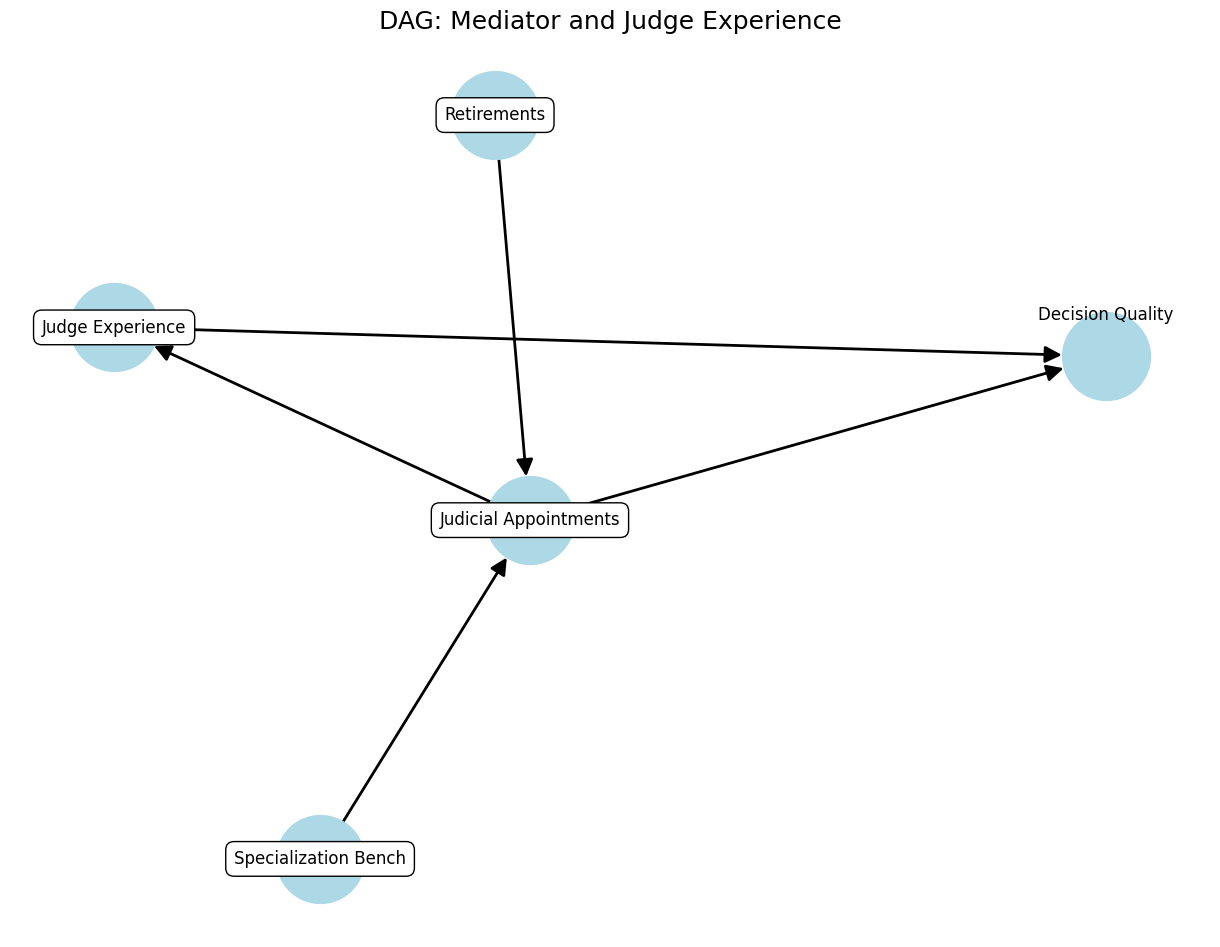

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

dag_judge_experience = nx.DiGraph()

dag_judge_experience.add_nodes_from([
    "Retirements", "Judicial Appointments", "Specialization Bench",
    "Judge Experience", "Decision Quality"
])

dag_judge_experience.add_edges_from([
    ("Retirements", "Judicial Appointments"),
    ("Specialization Bench", "Judicial Appointments"),
    ("Judicial Appointments", "Judge Experience"),
    ("Judge Experience", "Decision Quality"),
    ("Judicial Appointments", "Decision Quality")
])

pos = nx.spring_layout(dag_judge_experience, seed=42)

pos['Judge Experience'][0] -= 0.4
pos['Decision Quality'][0] += 0.4
pos['Decision Quality'][1] += 0.1

labels = {node: node for node in dag_judge_experience.nodes}
bbox_options = dict(boxstyle="round,pad=0.5", edgecolor="black", facecolor="white")

plt.figure(figsize=(12, 9))
options = {
    "node_color": "lightblue",
    "node_size": 4000,
    "font_size": 14,
    "font_weight": "bold",
    "arrowsize": 25,
    "width": 2
}

nx.draw(dag_judge_experience, pos, with_labels=False, **options)

for node in dag_judge_experience.nodes:
    if node == "Decision Quality":
        nx.draw_networkx_labels(dag_judge_experience, {node: (pos[node][0], pos[node][1] + 0.1)}, labels={node: node}, font_color="black")
    else:
        nx.draw_networkx_labels(dag_judge_experience, {node: pos[node]}, labels={node: node}, bbox=bbox_options)

plt.title("DAG: Mediator and Judge Experience", fontsize=18)
plt.show()


**Fixing the DAG 4 becaues it's too simple**

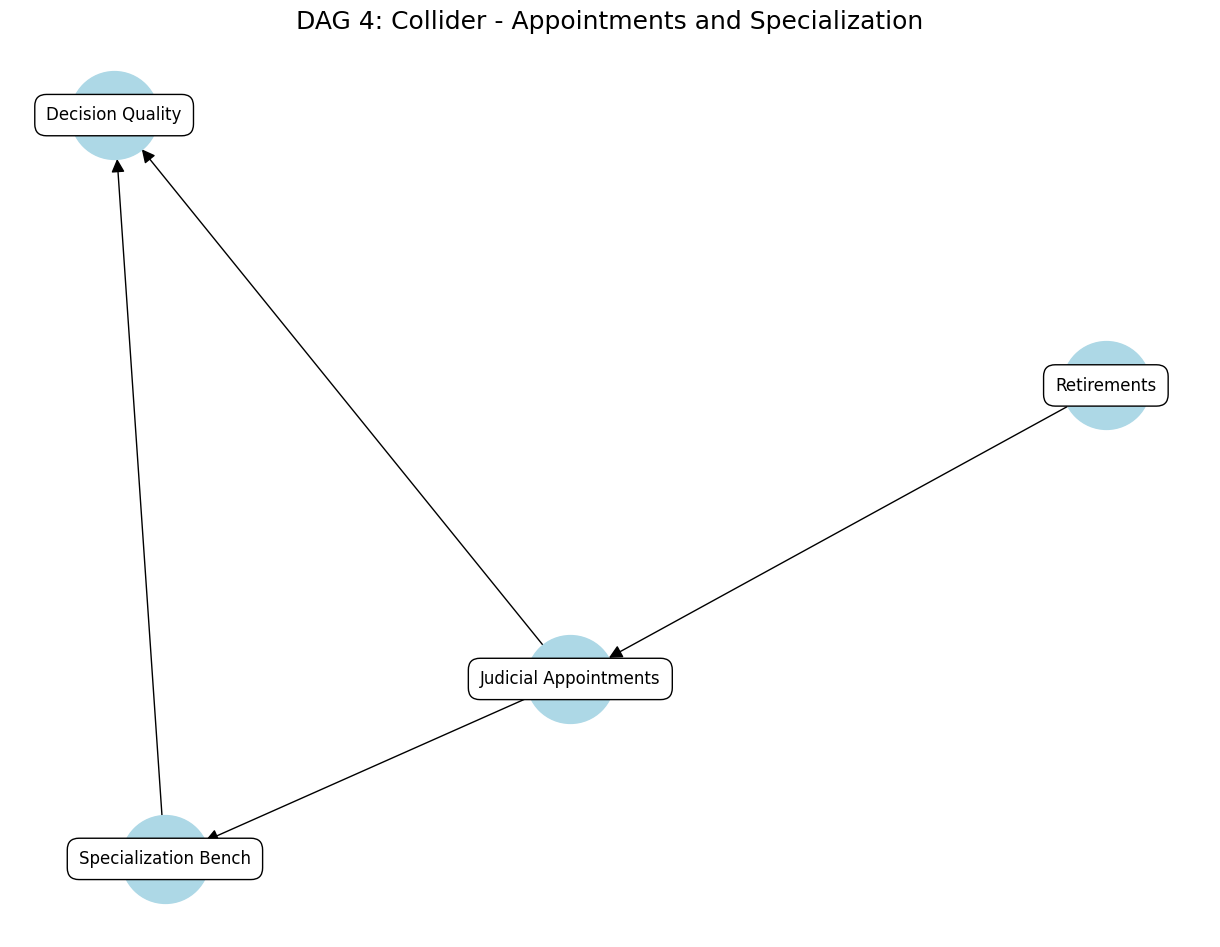

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

dag_collider = nx.DiGraph()

dag_collider.add_nodes_from([
    "Retirements", "Judicial Appointments", "Specialization Bench", "Decision Quality"
])

dag_collider.add_edges_from([
    ("Retirements", "Judicial Appointments"),
    ("Judicial Appointments", "Decision Quality"),
    ("Specialization Bench", "Decision Quality"),
    ("Judicial Appointments", "Specialization Bench")
])

pos = nx.spring_layout(dag_collider, seed=42, k=1.5)

for key in pos:
    pos[key][0] += 0.3
    pos[key][1] += 0.2

labels = {node: node for node in dag_collider.nodes}
bbox_options = dict(boxstyle="round,pad=0.7", edgecolor="black", facecolor="white")

plt.figure(figsize=(12, 9))
options = {
    "node_color": "lightblue",
    "node_size": 4000,
    "font_size": 14,
    "font_weight": "bold",
    "arrowsize": 20
}

nx.draw(dag_collider, pos, with_labels=False, **options)
nx.draw_networkx_labels(dag_collider, pos, labels=labels, bbox=bbox_options)

plt.title("DAG 4: Collider - Appointments and Specialization", fontsize=18)
plt.show()
